Setting Up Kaggle Data on Colab

In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
import json
token = {"username":"ris320","key":"534f406c37f08f65191d1dd6b400d921"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

In [ ]:
!unzip '/content/{/content}/datasets/gpiosenka/100-bird-species/100-bird-species.zip'

Importing the Necessary Libraries

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
import seaborn as sns
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

Exploring the Data

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
train=os.listdir('train')
test=os.listdir('test')
validation=os.listdir('valid')

print('Total Train Folders:',len(train))
print('Total Test Folders:',len(test))
print('Total Validation Folders:',len(validation))

Total Train Folders: 225
Total Test Folders: 225
Total Validation Folders: 225


In [ ]:
# Visualizing Some Random Images
def plot_image(directory_path,samples):
  master_list=[]
  readed_images=[]
  train_images_folder=[os.path.join(directory_path,i) for i in os.listdir(directory_path)]
  images_folder=random.sample(train_images_folder,samples)

  for img_path in images_folder:
    images_path=[os.path.join(img_path,i) for i in os.listdir(img_path)]
    master_list.append(images_path)

  flatten_list =[item for sublist in master_list for item in sublist]

  random_img_samples=random.sample(flatten_list,samples)

  plt.figure(figsize=(10,10)) # specifying the overall grid size

  for img in random_img_samples:
    image=cv2.imread(img)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    readed_images.append(image)
  
  for i in range(0,samples):
      plt.subplot(5,5,i+1)    
      plt.imshow(readed_images[i])
  plt.show()

<Figure size 3600x3600 with 0 Axes>

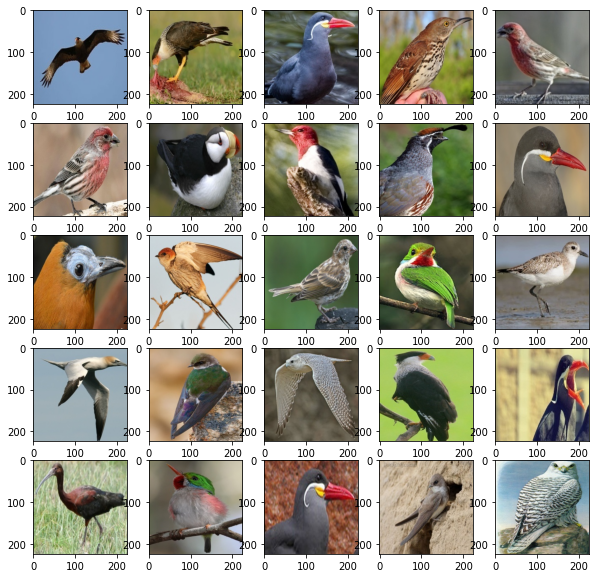

In [ ]:
plt.figure(figsize=(50,50))
plot_image('train',25)

<Figure size 3600x3600 with 0 Axes>

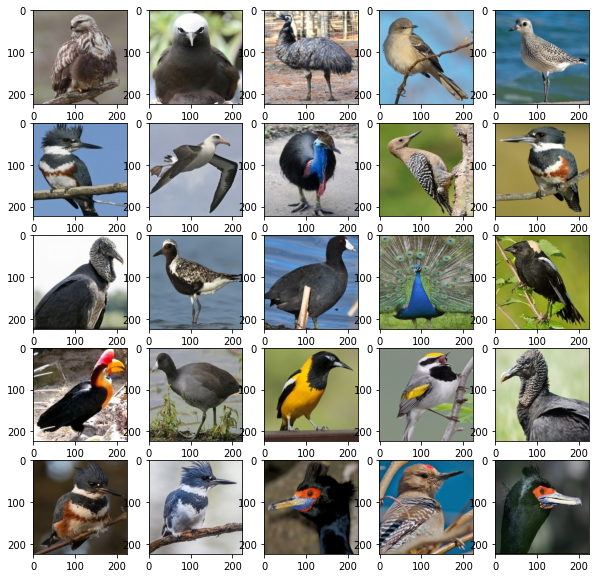

In [ ]:
# Visualizing Some Random Test Images
plt.figure(figsize=(50,50))
plot_image('test',25)

In [ ]:
def heatmap_plot(directory_path,samples):
  master_list=[]
  readed_images=[]
  train_images_folder=[os.path.join(directory_path,i) for i in os.listdir(directory_path)]
  images_folder=random.sample(train_images_folder,samples)

  for img_path in images_folder:
    images_path=[os.path.join(img_path,i) for i in os.listdir(img_path)]
    master_list.append(images_path)

  flatten_list =[item for sublist in master_list for item in sublist]

  random_img_samples=random.sample(flatten_list,samples)

  plt.figure(figsize=(10,10)) # specifying the overall grid size

  for img in random_img_samples:
    image=cv2.imread(img)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
    readed_images.append(image)
  
  for i in range(0,samples):
      plt.subplot(5,5,i+1)    
      plt.imshow(readed_images[i])
  plt.show()

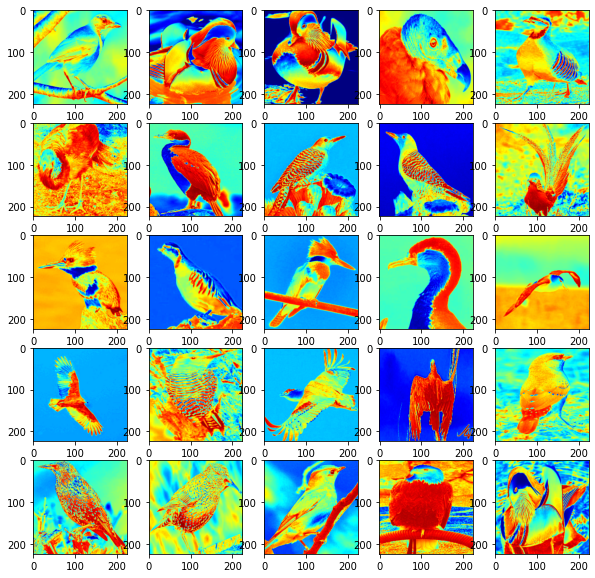

In [ ]:
#  Visualizing Train Heatmap Images
heatmap_plot('train',25)

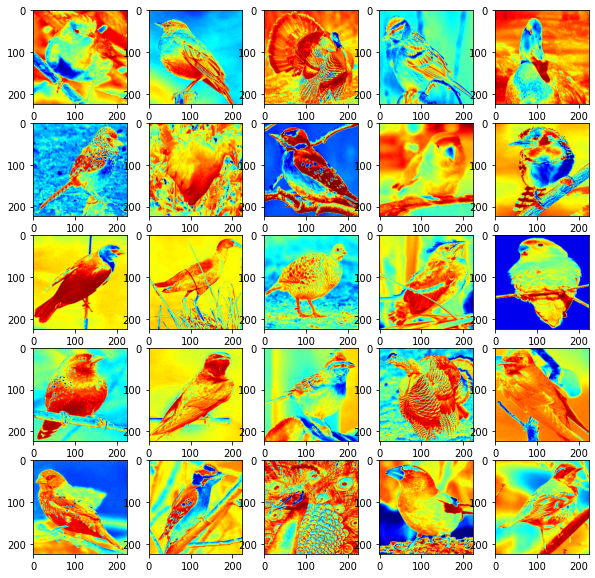

In [ ]:
# Visualizing Validation Heatmap Images
heatmap_plot('valid',25)

In [ ]:
# Checking the Classes Distribution
def check_distribution(directory_path):    
  bird_count={}
  bird_species=os.listdir(directory_path)
  
  for species in bird_species:
    species_count=len(os.listdir(os.path.join(directory_path,species)))
    bird_count.update({species:species_count})

  plt.figure(figsize=(40,120))
  sns.barplot(list(bird_count.values()),list(bird_count.keys()))
  plt.title("Bird Species Distribution",fontsize=30)
  plt.xlabel("Bird Species Count",fontsize=30)
  plt.ylabel("Bird Species",fontsize=30)

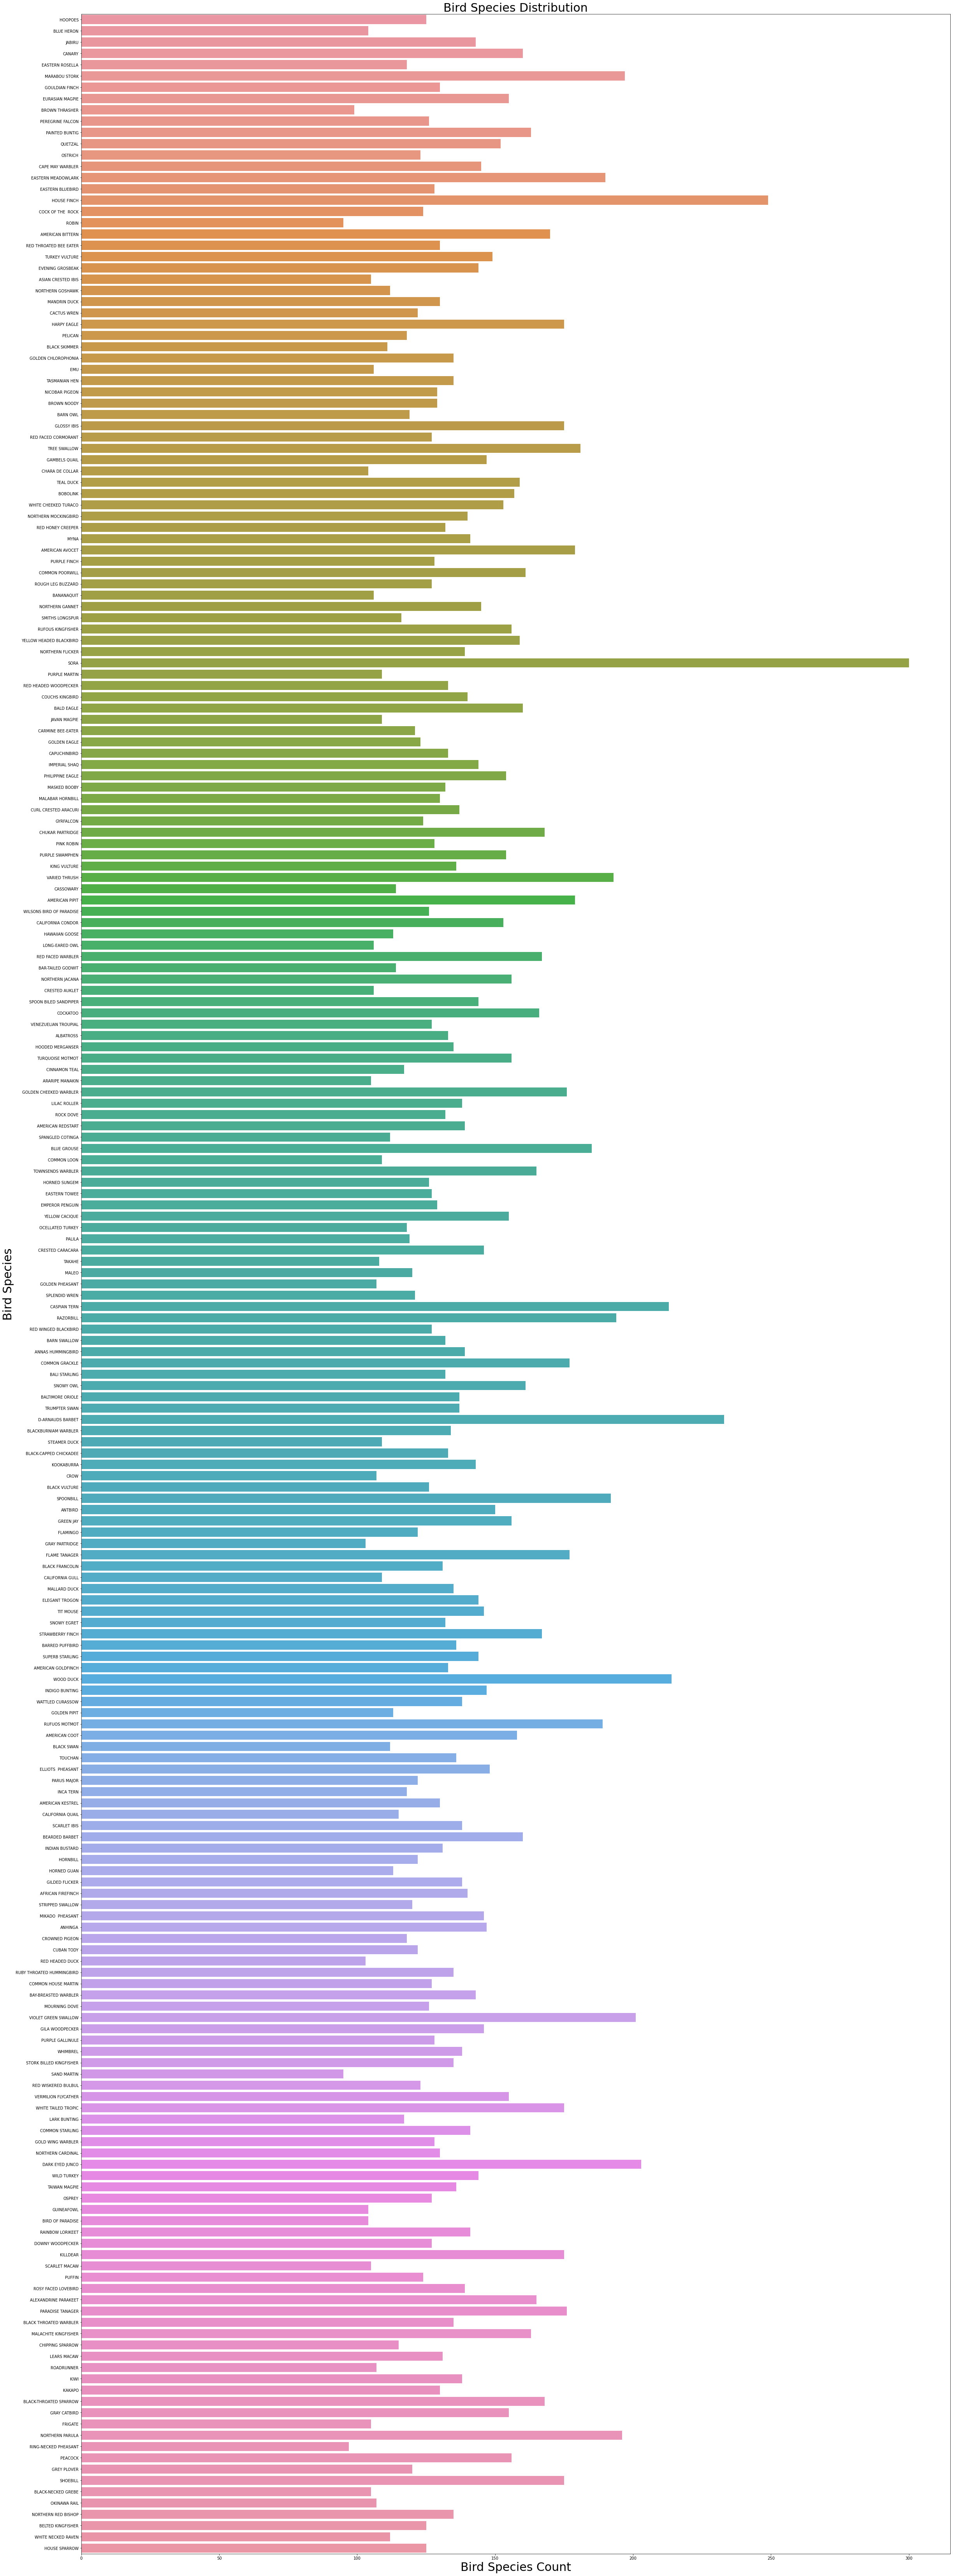

In [ ]:
# Checking the Training Data Distribution
check_distribution("train")

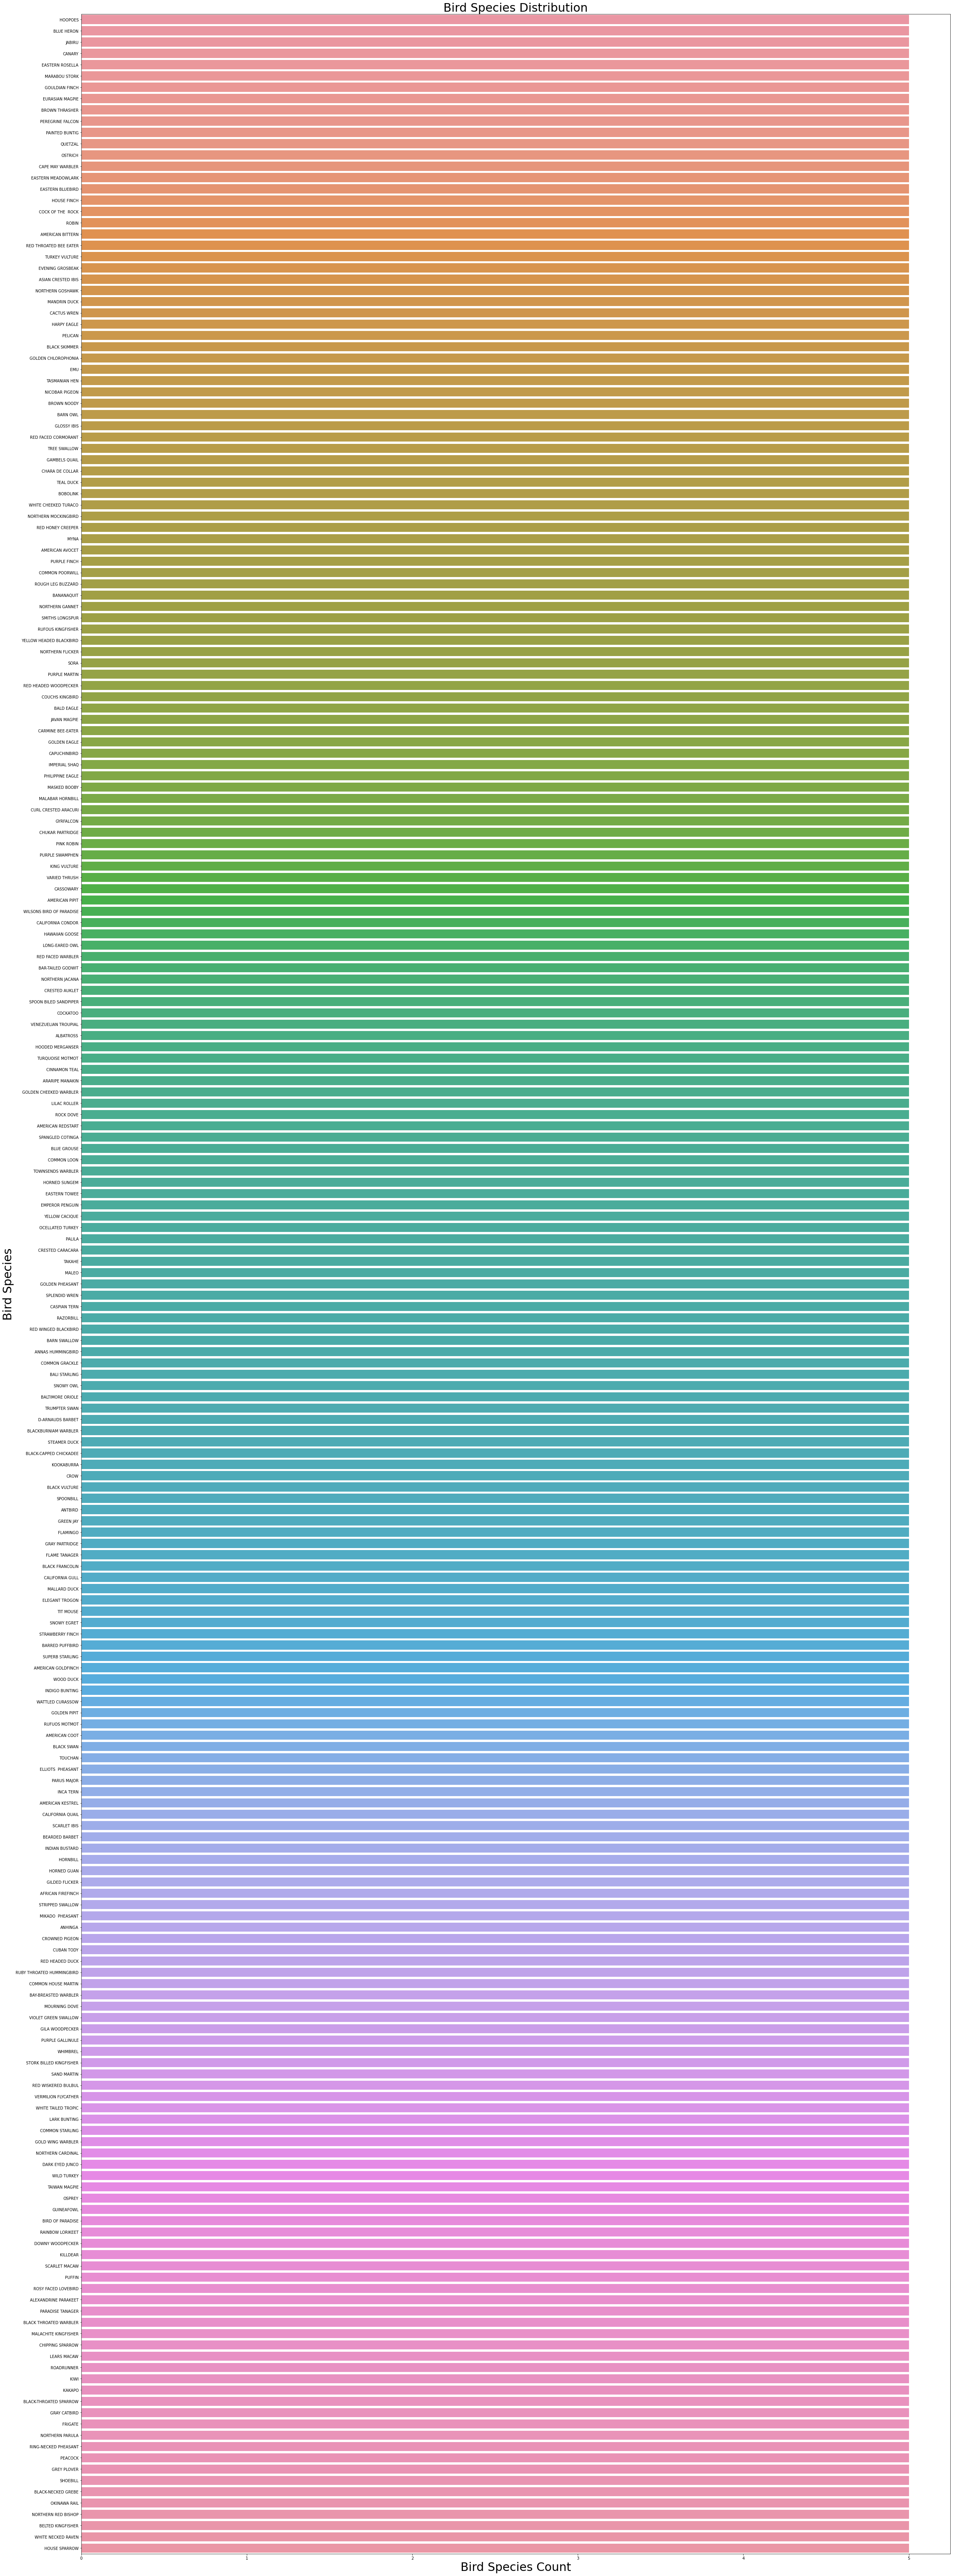

In [ ]:
# Checking the Validation Distribution
check_distribution("valid")

Setting up the Data Generators

In [ ]:
classes_train=os.listdir('train')
classes_val=os.listdir('valid')
classes_test=os.listdir('test')

In [ ]:
# Defining the Constants
BATCH_SIZE=32
BATCH_SIZE_TEST=1
IMAGE_SIZE=224
CHANNELS=3
EPOCHS=10
LR=0.001
NUM_CLASSES=225
STEPS=1125
TRAINING_SAMPLES=32441

In [ ]:
# Preparing Training Validation and Test Dataset
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2
    )

# Training Generator

training_generator=datagen.flow_from_directory(
    'train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    class_mode='categorical',
    classes=classes_train,
    batch_size=BATCH_SIZE,
    color_mode='rgb'
    )

print(training_generator.class_indices)

# Validation Generator

validation_generator=datagen.flow_from_directory(
    'valid',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    class_mode='categorical',
    color_mode='rgb',
    classes=classes_val,
    batch_size=BATCH_SIZE
)
print(validation_generator.class_indices)


test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Testing Generator
test_generator=test_datagen.flow_from_directory(
'test',
target_size=(IMAGE_SIZE,IMAGE_SIZE),
class_mode='categorical',
classes=classes_test,
shuffle=False,
batch_size=BATCH_SIZE_TEST,
)

print(test_generator.class_indices)

Found 31316 images belonging to 225 classes.
{'YELLOW CACIQUE': 0, 'CAPUCHINBIRD': 1, 'MIKADO  PHEASANT': 2, 'GYRFALCON': 3, 'CALIFORNIA CONDOR': 4, 'BAR-TAILED GODWIT': 5, 'PELICAN': 6, 'COCK OF THE  ROCK': 7, 'EASTERN BLUEBIRD': 8, 'DARK EYED JUNCO': 9, 'NORTHERN GANNET': 10, 'RED HONEY CREEPER': 11, 'TAKAHE': 12, 'EVENING GROSBEAK': 13, 'BLACK-CAPPED CHICKADEE': 14, 'CROWNED PIGEON': 15, 'MALABAR HORNBILL': 16, 'BALTIMORE ORIOLE': 17, 'AMERICAN REDSTART': 18, 'SPANGLED COTINGA': 19, 'WHITE TAILED TROPIC': 20, 'TASMANIAN HEN': 21, 'BLACK-THROATED SPARROW': 22, 'COMMON LOON': 23, 'CUBAN TODY': 24, 'SCARLET MACAW': 25, 'JABIRU': 26, 'AMERICAN AVOCET': 27, 'SMITHS LONGSPUR': 28, 'LARK BUNTING': 29, 'WHITE CHEEKED TURACO': 30, 'HOOPOES': 31, 'MALEO': 32, 'PAINTED BUNTIG': 33, 'TURKEY VULTURE': 34, 'GREY PLOVER': 35, 'WHITE NECKED RAVEN': 36, 'CASPIAN TERN': 37, 'HOUSE SPARROW': 38, 'GOLDEN EAGLE': 39, 'INDIGO BUNTING': 40, 'SCARLET IBIS': 41, 'EMPEROR PENGUIN': 42, 'GRAY CATBIRD': 43, 'R

In [ ]:
import pickle
bird_species=test_generator.class_indices

In [ ]:
with open("Bird_species.pickle","wb") as file:
  pickle.dump(bird_species,file)

Building the CNN

In [ ]:
def build_model():
    
  base_model=tf.keras.applications.DenseNet201(weights="imagenet",include_top=False,input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS))

  # Freezing all the layers
  for layer in base_model.layers[:703]:
    layer.trainable=False

  x=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

  out=tf.keras.layers.Dense(NUM_CLASSES,activation="softmax")(x)

  # Calling the Model Constructor
  model=tf.keras.Model(inputs=base_model.input,outputs=out)

  return model


In [ ]:
# Checking the Model Summary
model=build_model()
model.summary()

# for i,layer in enumerate(model.layers):
#   print(i,layer)

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

Training Fitting and Validating the Model

In [ ]:
# Defining the Model Callbacks
save_best=tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',monitor="val_loss",save_best_only=True)
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss')
# early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

my_callbacks=[save_best,reduce_lr]

In [ ]:
# Compiling the Model
opt=tf.keras.optimizers.Adam(learning_rate=LR)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fitting the Model
history=model.fit_generator(training_generator,validation_data=validation_generator,steps_per_epoch=training_generator.samples//BATCH_SIZE,validation_steps=validation_generator.samples//BATCH_SIZE,callbacks=my_callbacks,epochs=EPOCHS,workers=16,shuffle=False)

Epoch 1/10
978/978 [==============================] - 329s 337ms/step - loss: 1.4713 - accuracy: 0.7130 - val_loss: 0.3202 - val_accuracy: 0.9268
Epoch 2/10
978/978 [==============================] - 328s 335ms/step - loss: 0.3654 - accuracy: 0.9101 - val_loss: 0.1963 - val_accuracy: 0.9536
Epoch 3/10
978/978 [==============================] - 326s 333ms/step - loss: 0.2405 - accuracy: 0.9365 - val_loss: 0.1932 - val_accuracy: 0.9464
Epoch 4/10
978/978 [==============================] - 326s 333ms/step - loss: 0.1752 - accuracy: 0.9523 - val_loss: 0.1610 - val_accuracy: 0.9536
Epoch 5/10
978/978 [==============================] - 324s 332ms/step - loss: 0.1367 - accuracy: 0.9617 - val_loss: 0.1825 - val_accuracy: 0.9411
Epoch 6/10
978/978 [==============================] - 325s 332ms/step - loss: 0.1119 - accuracy: 0.9678 - val_loss: 0.1817 - val_accuracy: 0.9473
Epoch 7/10
978/978 [==============================] - 327s 334ms/step - loss: 0.0974 - accuracy: 0.9724 - val_loss: 0.1579 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


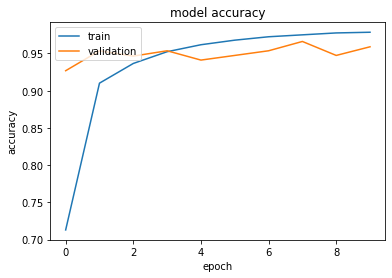

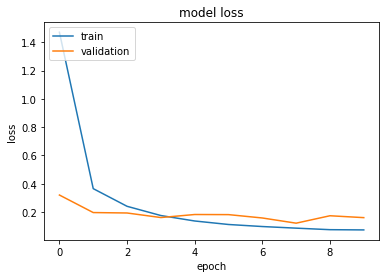

In [ ]:
# Plotting Accuracy and Loss
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Saving and Evaluating the Model

In [ ]:
# Saving the Model
model.save("model.h5")

In [ ]:
# Evaluating the Model
test_generator.reset()
model.evaluate(test_generator,batch_size=BATCH_SIZE_TEST,steps=STEPS)

1125/1125 [==============================] - 21s 19ms/step - loss: 0.0569 - accuracy: 0.9822


[0.05685517191886902, 0.9822221994400024]

Testing the Model

In [ ]:
cm_probabilities=model.predict(test_generator,steps=1125)
cm_predictions=np.argmax(cm_probabilities,axis=1)
cm_correct_labels=test_generator.classes

In [ ]:
CLASSES=range(len(classes_test))

In [ ]:
def display_confusion_matrix(cmat, score, precision, recall):
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Reds')
    ax.set_xticks(range(len(CLASSES)))
    ax.set_xticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(len(CLASSES)))
    ax.set_yticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(101, 1, titlestring, fontdict={'fontsize': 18, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#804040'})
    plt.show()

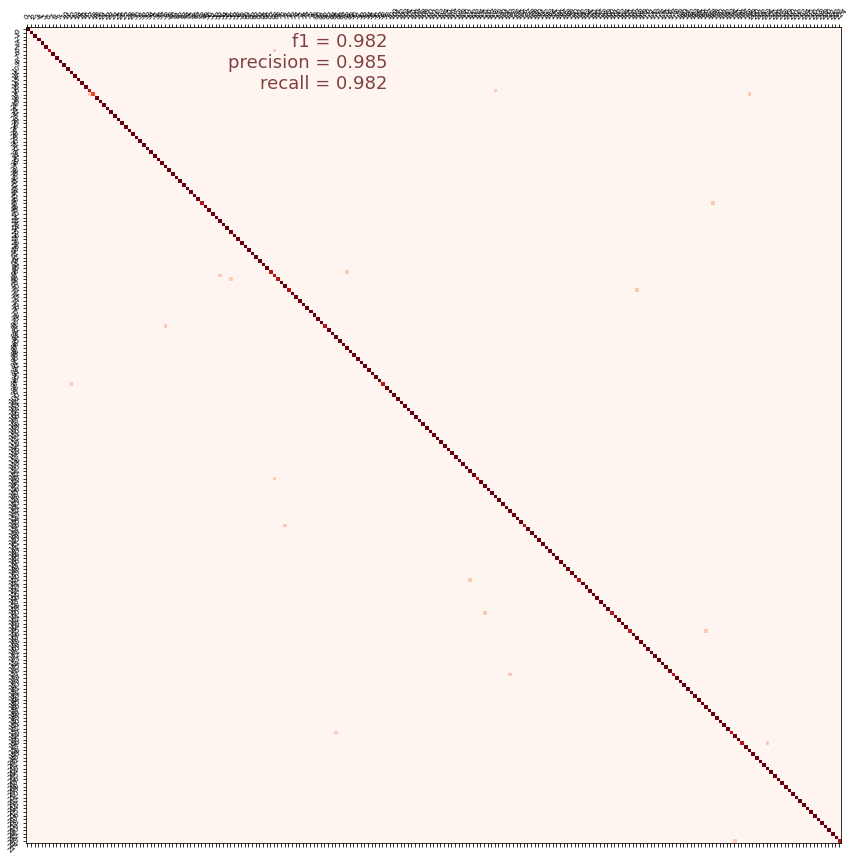

In [ ]:
cmat = confusion_matrix(
    cm_correct_labels,
    cm_predictions
)

cmat = (cmat.T / cmat.sum(axis=1)).T # normalize

score = f1_score(
    cm_correct_labels,
    cm_predictions,
    average='macro',
)
precision = precision_score(
    cm_correct_labels,
    cm_predictions,
    average='macro',
)
recall = recall_score(
    cm_correct_labels,
    cm_predictions,
    average='macro',
)
display_confusion_matrix(cmat, score, precision, recall)